In [ ]:
%pip install networkx">=2.5"
%pip install scikit-fuzzy

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [13]:
fsai = ctrl.Antecedent(np.arange(0.0025, 0.0041, 0.0001), 'fsai')
nivel = ctrl.Antecedent(np.arange(1, 1.401, 0.001), 'nivel')

f1 = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'f1')
f2 = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'f2')
f3 = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'f3')

fsai['baixo'] = fuzz.trapmf(fsai.universe, [0.000481, 0.0025, 0.003, 0.0033])
fsai['normal'] = fuzz.trimf(fsai.universe, [0.003, 0.0033, 0.0036])

nivel['baixo'] = fuzz.trimf(nivel.universe, [0.84, 1, 1.2])
nivel['normal'] = fuzz.trimf(nivel.universe, [1, 1.2, 1.4])
nivel['alto'] = fuzz.trimf(nivel.universe, [1.2, 1.4, 1.56])

f1['ocorre'] = fuzz.gaussmf(f1.universe, 0.5, 0.1)
f2['ocorre'] = fuzz.gaussmf(f2.universe, 0.5, 0.1)
f3['ocorre'] = fuzz.gaussmf(f3.universe, 0.5, 0.1)

In [73]:
regra1 = ctrl.Rule(fsai['normal'] & nivel['normal'], f1['ocorre'])
regra2 = ctrl.Rule(fsai['normal'] & nivel['baixo'], f2['ocorre'])
regra3 = ctrl.Rule(fsai['normal'] & nivel['alto'], f3['ocorre'])
regra4 = ctrl.Rule(fsai['baixo'] & nivel['baixo'], f1['ocorre'])

Possibilidade de ocorrência da falha 1: 0.5000000000000002
Possibilidade de ocorrência da falha 2: 0.5000000000000001
Possibilidade de ocorrência da falha 3: 0.5000000000000001


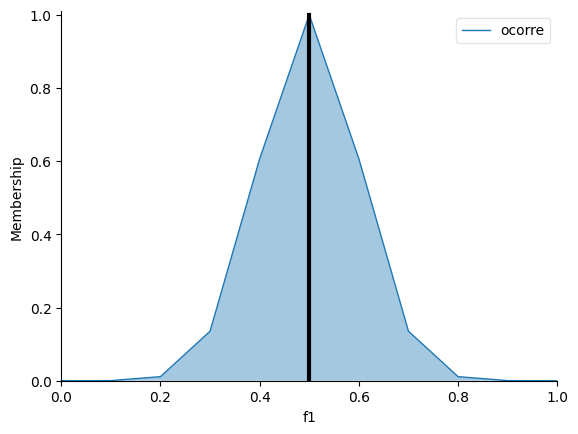

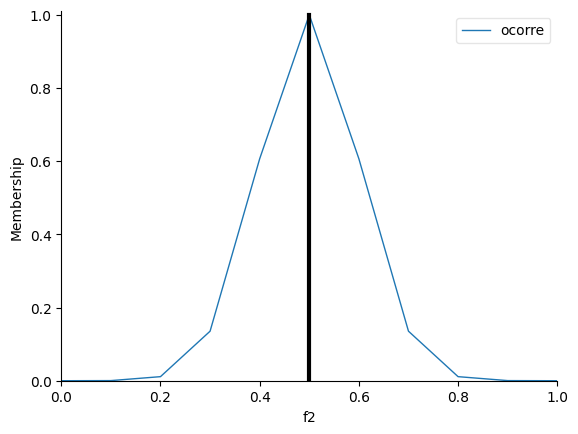

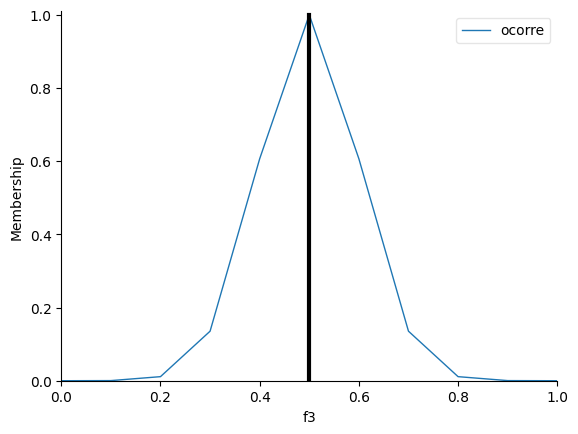

In [74]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4])
simulacao = ctrl.ControlSystemSimulation(sistema_controle)


simulacao.input['fsai'] = 0.0033
simulacao.input['nivel'] = 1.2

simulacao.compute()

f1_resultado = simulacao.output['f1']
f2_resultado = simulacao.output['f2']
f3_resultado = simulacao.output['f3']

print(f"Possibilidade de ocorrência da falha 1: {f1_resultado}")
print(f"Possibilidade de ocorrência da falha 2: {f2_resultado}")
print(f"Possibilidade de ocorrência da falha 3: {f3_resultado}")
f1.view(sim=simulacao)
f2.view(sim=simulacao)
f3.view(sim=simulacao)